In [1]:
# pip install selenium
# pip install pandas
# pip install nltk

In [2]:
pip install textblob

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time 
import requests

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
driver = webdriver.Chrome()
driver.get('https://www.flipkart.com/apple-iphone-15-black-128-gb/product-reviews/itm6ac6485515ae4?pid=MOBGTAGPTB3VS24W&lid=LSTMOBGTAGPTB3VS24WCTBCFM&marketplace=FLIPKART')
soup = BeautifulSoup(driver.page_source, 'html.parser')
# soup

In [5]:
names = []
reviews = []
places=[]
date = []
dates_call = []

for i in range(2,37):
    
    
# Names of customer
    Names = soup.find_all('p',{'class':'_2NsDsF AwS1CA'})
    for i in Names:
        t=i.text
        names.append(t.title())
#Reviews 
    Reviews = soup.find_all('p',{'class':"z9E0IG"})
    for i in Reviews:
        reviews.append(i.text)
# Places
    Places  =  soup.find_all('p',{"class":"MztJPv"})
    for i in Places:
        data = i.text.split(sep = ',')
        places.append(data[1])
    
# Dates 
    Dates = soup.find_all('p',{"class":"_2NsDsF"})
    for i in Dates:
        dates_call.append(i.text)
        
    date = dates_call[1::2]
    
#pagination  
    link = soup.find('a',{"class":"_9QVEpD"}).get("href")
    complete_link = 'https://www.flipkart.com'+link
    cmp_link = complete_link[:-1]





print(len(names))
print(len(places))
print(len(reviews))
print(len(date))



350
350
350
350


In [6]:
df = pd.DataFrame(data={"Name":names,"Reviews":reviews,"Cities":places,"Date":date})
df

,Name,Reviews,Cities,Date
0,Akash Deep,Classy product,Delhi Division,10 months ago
1,Sheetla Prasad Maurya,Worth the money,Sultanpur,"Oct, 2023"
2,Bijaya Mohanty,Worth every penny,Baleshwar,6 months ago
3,Ajin V,Mind-blowing purchase,Balaghat,"Oct, 2023"
4,Prithivi Boruah,Just wow!,Bokajan,"Oct, 2023"
...,...,...,...,...
345,Mousam Guha Roy,Good choice,Matialihat,"Oct, 2023"
346,Nikhil Kumar,Awesome,Meerut Division,10 months ago
347,Akshay Meena,Fabulous!,Jaipur,"Nov, 2023"
348,Flipkart Customer,Worth every penny,Aizawl,10 months ago


In [7]:
# file = df.to_csv('Flipkart_iphone_15_Reviews',index = False)

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import string


import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# df['Reviews_t'] = df['Reviews'].apply(sent_tokenize)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\RITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
df['Reviews_t'] = df['Reviews'].str.lower()
df

,Name,Reviews,Cities,Date,Reviews_t
0,Akash Deep,Classy product,Delhi Division,10 months ago,classy product
1,Sheetla Prasad Maurya,Worth the money,Sultanpur,"Oct, 2023",worth the money
2,Bijaya Mohanty,Worth every penny,Baleshwar,6 months ago,worth every penny
3,Ajin V,Mind-blowing purchase,Balaghat,"Oct, 2023",mind-blowing purchase
4,Prithivi Boruah,Just wow!,Bokajan,"Oct, 2023",just wow!
...,...,...,...,...,...
345,Mousam Guha Roy,Good choice,Matialihat,"Oct, 2023",good choice
346,Nikhil Kumar,Awesome,Meerut Division,10 months ago,awesome
347,Akshay Meena,Fabulous!,Jaipur,"Nov, 2023",fabulous!
348,Flipkart Customer,Worth every penny,Aizawl,10 months ago,worth every penny


In [10]:
df['Reviews_t'] =df['Reviews_t'].apply(sent_tokenize)
df

,Name,Reviews,Cities,Date,Reviews_t
0,Akash Deep,Classy product,Delhi Division,10 months ago,[classy product]
1,Sheetla Prasad Maurya,Worth the money,Sultanpur,"Oct, 2023",[worth the money]
2,Bijaya Mohanty,Worth every penny,Baleshwar,6 months ago,[worth every penny]
3,Ajin V,Mind-blowing purchase,Balaghat,"Oct, 2023",[mind-blowing purchase]
4,Prithivi Boruah,Just wow!,Bokajan,"Oct, 2023",[just wow!]
...,...,...,...,...,...
345,Mousam Guha Roy,Good choice,Matialihat,"Oct, 2023",[good choice]
346,Nikhil Kumar,Awesome,Meerut Division,10 months ago,[awesome]
347,Akshay Meena,Fabulous!,Jaipur,"Nov, 2023",[fabulous!]
348,Flipkart Customer,Worth every penny,Aizawl,10 months ago,[worth every penny]


In [11]:
from statistics import mean
def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

df['Polarity'] = df['Reviews_t'].apply(get_polarity)
def cal_avg_polarity(polarities):
    return mean(polarities) if polarities else 0

df['Average_Pol'] = df['Polarity'].apply(cal_avg_polarity)
df

,Name,Reviews,Cities,Date,Reviews_t,Polarity,Average_Pol
0,Akash Deep,Classy product,Delhi Division,10 months ago,[classy product],[0.1],0.100
1,Sheetla Prasad Maurya,Worth the money,Sultanpur,"Oct, 2023",[worth the money],[0.3],0.300
2,Bijaya Mohanty,Worth every penny,Baleshwar,6 months ago,[worth every penny],[0.3],0.300
3,Ajin V,Mind-blowing purchase,Balaghat,"Oct, 2023",[mind-blowing purchase],[0.0],0.000
4,Prithivi Boruah,Just wow!,Bokajan,"Oct, 2023",[just wow!],[0.125],0.125
...,...,...,...,...,...,...,...
345,Mousam Guha Roy,Good choice,Matialihat,"Oct, 2023",[good choice],[0.7],0.700
346,Nikhil Kumar,Awesome,Meerut Division,10 months ago,[awesome],[1.0],1.000
347,Akshay Meena,Fabulous!,Jaipur,"Nov, 2023",[fabulous!],[0.5],0.500
348,Flipkart Customer,Worth every penny,Aizawl,10 months ago,[worth every penny],[0.3],0.300


### Task:  Check for null values , if found remove it 

In [12]:
df.isna().sum()  # no null values 

Name           0
Reviews        0
Cities         0
Date           0
Reviews_t      0
Polarity       0
Average_Pol    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         350 non-null    object 
 1   Reviews      350 non-null    object 
 2   Cities       350 non-null    object 
 3   Date         350 non-null    object 
 4   Reviews_t    350 non-null    object 
 5   Polarity     350 non-null    object 
 6   Average_Pol  350 non-null    float64
dtypes: float64(1), object(6)
memory usage: 19.3+ KB


In [14]:
col = df.columns
col

Index(['Name', 'Reviews', 'Cities', 'Date', 'Reviews_t', 'Polarity',
       'Average_Pol'],
      dtype='object')

### Task:  Eliminate any duplicate reviews to ensure data quality.

In [15]:
for c in col:
    print(f"Number of duplicate values in column {c} : {df[c].duplicated().sum()}")

Number of duplicate values in column Name : 340
Number of duplicate values in column Reviews : 341
Number of duplicate values in column Cities : 340
Number of duplicate values in column Date : 345
Number of duplicate values in column Reviews_t : 341
Number of duplicate values in column Polarity : 343
Number of duplicate values in column Average_Pol : 343


In [16]:
df[df['Reviews'] =="Worth every penny"]

,Name,Reviews,Cities,Date,Reviews_t,Polarity,Average_Pol
2,Bijaya Mohanty,Worth every penny,Baleshwar,6 months ago,[worth every penny],[0.3],0.3
8,Flipkart Customer,Worth every penny,Aizawl,10 months ago,[worth every penny],[0.3],0.3
12,Bijaya Mohanty,Worth every penny,Baleshwar,6 months ago,[worth every penny],[0.3],0.3
18,Flipkart Customer,Worth every penny,Aizawl,10 months ago,[worth every penny],[0.3],0.3
22,Bijaya Mohanty,Worth every penny,Baleshwar,6 months ago,[worth every penny],[0.3],0.3
...,...,...,...,...,...,...,...
328,Flipkart Customer,Worth every penny,Aizawl,10 months ago,[worth every penny],[0.3],0.3
332,Bijaya Mohanty,Worth every penny,Baleshwar,6 months ago,[worth every penny],[0.3],0.3
338,Flipkart Customer,Worth every penny,Aizawl,10 months ago,[worth every penny],[0.3],0.3
342,Bijaya Mohanty,Worth every penny,Baleshwar,6 months ago,[worth every penny],[0.3],0.3


### Task: Analyze the sentiment of each review to classify them as either positive or negative.

In [17]:
    
import pandas as pd
from textblob import TextBlob

def sentimental_classify(review):
    polarity_score = TextBlob(review).sentiment.polarity 

    if polarity_score >= 0.1:
        return 'Positive'
    else : 
        return 'Negative'

Sentiment_classification = [sentimental_classify(review) for review in df['Reviews']]
# Sentiment_classification

In [18]:
df['Sentiment_classification'] =Sentiment_classification
df

,Name,Reviews,Cities,Date,Reviews_t,Polarity,Average_Pol,Sentiment_classification
0,Akash Deep,Classy product,Delhi Division,10 months ago,[classy product],[0.1],0.100,Positive
1,Sheetla Prasad Maurya,Worth the money,Sultanpur,"Oct, 2023",[worth the money],[0.3],0.300,Positive
2,Bijaya Mohanty,Worth every penny,Baleshwar,6 months ago,[worth every penny],[0.3],0.300,Positive
3,Ajin V,Mind-blowing purchase,Balaghat,"Oct, 2023",[mind-blowing purchase],[0.0],0.000,Negative
4,Prithivi Boruah,Just wow!,Bokajan,"Oct, 2023",[just wow!],[0.125],0.125,Positive
...,...,...,...,...,...,...,...,...
345,Mousam Guha Roy,Good choice,Matialihat,"Oct, 2023",[good choice],[0.7],0.700,Positive
346,Nikhil Kumar,Awesome,Meerut Division,10 months ago,[awesome],[1.0],1.000,Positive
347,Akshay Meena,Fabulous!,Jaipur,"Nov, 2023",[fabulous!],[0.5],0.500,Positive
348,Flipkart Customer,Worth every penny,Aizawl,10 months ago,[worth every penny],[0.3],0.300,Positive


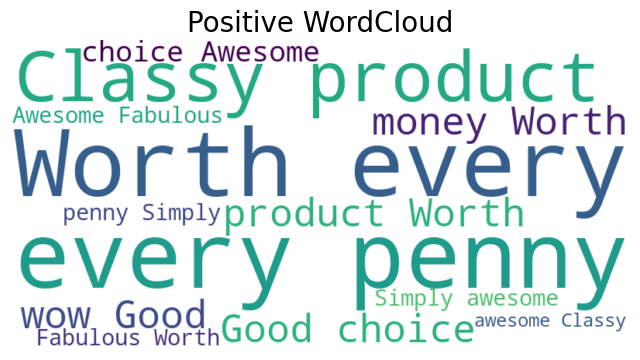

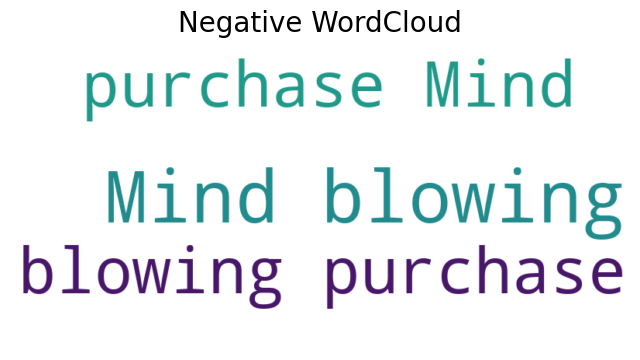

In [19]:
### wordcloud
positive_reviews = ' '.join(df[df["Sentiment_classification"]=='Positive']['Reviews'])
negative_reviews = ' '.join(df[df['Sentiment_classification']=='Negative']['Reviews'])
from wordcloud import WordCloud

def create_wordcloud(text,title):
    cloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8,6))
    plt.imshow(X=cloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()


create_wordcloud(positive_reviews,'Positive WordCloud')
create_wordcloud(negative_reviews,'Negative WordCloud')

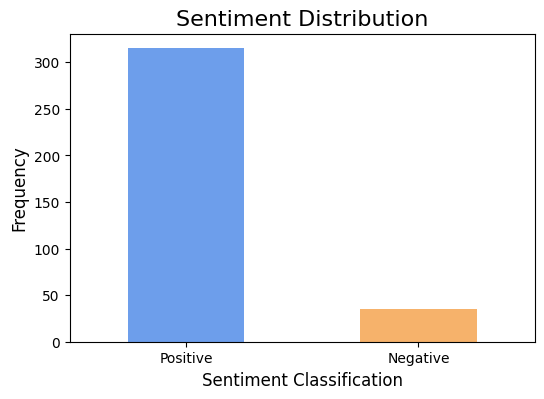

In [20]:

# Step 1: Count the number of sentiments
sentiment_counts = df['Sentiment_classification'].value_counts()

# Step 2: Create a bar plot
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['#6d9eeb', '#f6b26b', '#e06666'])

# Step 3: Add labels and title
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment Classification', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)  # Keep the labels horizontal for clarity
# Show the plot
plt.show()


### Review Length vs Avg Polarity

Correlation between Review Length and Average Polarity: -0.53


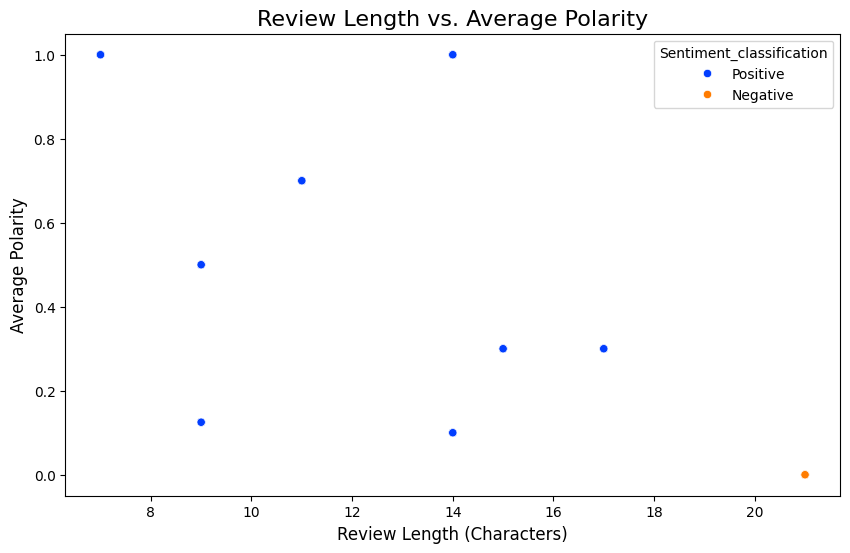

In [24]:
# Correlation between review length and average polarity
df['Review_Length'] = df['Reviews'].apply(len)
correlation = df['Review_Length'].corr(df['Average_Pol'])
print(f"Correlation between Review Length and Average Polarity: {correlation:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Review_Length', y='Average_Pol', hue='Sentiment_classification', data=df, palette='bright')
plt.title('Review Length vs. Average Polarity', fontsize=16)
plt.xlabel('Review Length (Characters)', fontsize=12)
plt.ylabel('Average Polarity', fontsize=12)
plt.show()
